In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as scipy
from math import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec

Vector común de frecuencias externas

In [2]:
dw = 0.001 # paso en la frecuencia externa
w =  np.array([i*dw for i in range(int(12*0.1/dw),int(1.6/dw)+1)]) # Frecuencia fuerza externa

Cargar datos de dimensión fractal

In [3]:
a = open('dimensión_fractal.txt','r')

fracdim = a.readlines()
df = np.zeros(w.size)
res = np.zeros(w.size)

for i in range(w.size):
    fracdim[i] = fracdim[i].split()
    df[i] = fracdim[i][0]
    res[i] = fracdim[i][1]

a.close()

Cargar datos de Poincaré

In [4]:
xp = []
vp = []

for i in range(w.size):
    b = open('xp ω = '+str(format(w[i],'.3f'))+'.txt','r')
    c = open('vp ω = '+str(format(w[i],'.3f'))+'.txt','r')
    XP = b.readlines()
    VP = c.readlines()
    for j in range(len(XP)):
        XP[j] = float((XP[j].split())[0])
        VP[j] = float((VP[j].split())[0])
    xp.append(XP)
    vp.append(VP)

b.close()
c.close()

Cargar datos de tiempos

In [5]:
num_bin = 8000
tdist_hist = np.zeros([w.size,num_bin])

for i in range(w.size):
    d = open('tdist ω = '+str(format(w[i],'.3f'))+'.txt','r')
    tdist_hist[i:] = d.readlines()

d.close()

Cargar datos de exponentes de Lyapunov

In [6]:
e = open('explyap.txt','r')

explyap = e.readlines()
lyap = np.zeros(w.size)
disp = np.zeros(w.size)

for i in range(w.size):
    explyap[i] = explyap[i].split()
    lyap[i] = explyap[i][0]
    disp[i] = explyap[i][1]

e.close()

Cargo datos de Poincaré según T

In [5]:
wT = 1.411
TT = 2*pi/wT

In [6]:
xpT = []
vpT = []

for i in range(int(np.round(TT*10))):
    f = open('xpT T + '+str(format(0.1*i,'.1f'))+'.txt','r')
    g = open('vpT T + '+str(format(0.1*i,'.1f'))+'.txt','r')
    XPT = f.readlines()
    VPT = g.readlines()
    for j in range(len(XPT)):
        XPT[j] = float((XPT[j].split())[0])
        VPT[j] = float((VPT[j].split())[0])
    xpT.append(XPT)
    vpT.append(VPT)

f.close()
g.close()

Representación figura 1: exp. Lyap. + dim. frac. + bif. pos. + bif. vel

Text(0.5, 1.0, 'Bifurcation diagram of velocities')

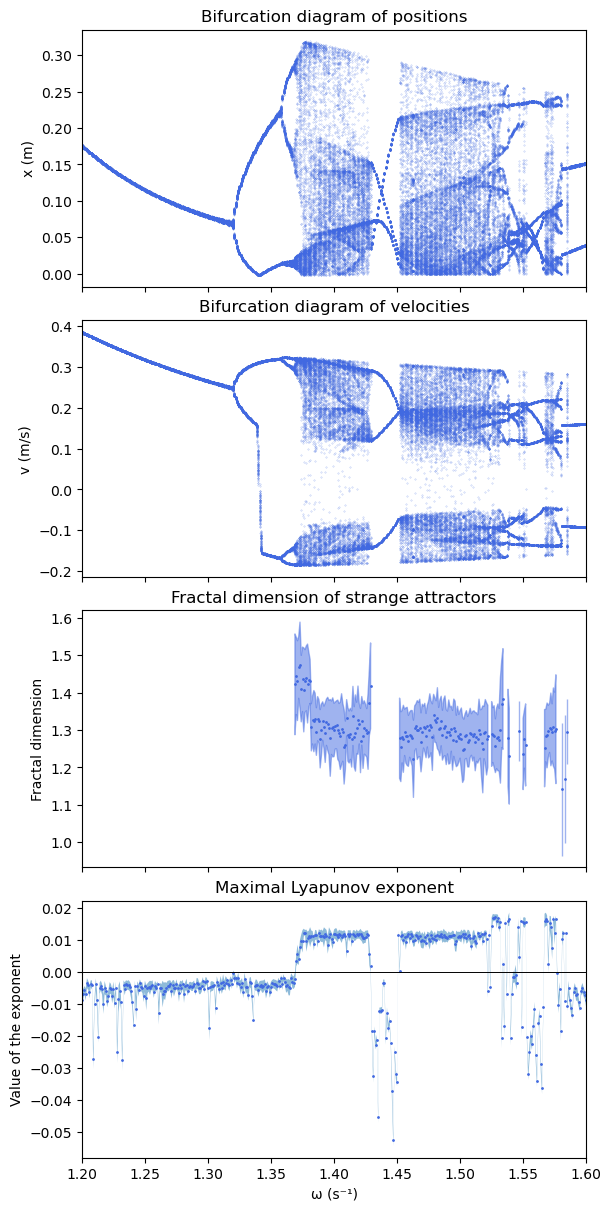

In [9]:
fig1,(ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(6, 12), sharex = True, constrained_layout=True)

ax3.plot(w,df,'.', markersize = '2', color = 'royalblue')
ax3.fill_between(w,df-res,df+res,alpha = 0.5, color = 'royalblue')
ax3.set_ylabel('Fractal dimension')
ax3.set_title('Fractal dimension of strange attractors')
ax3.set_xlim(min(w),max(w))
#ax3.set_ylim([0.9,1.7])

ax4.fill_between(w,lyap-disp,lyap+disp,alpha = 0.5)#,color ='royalblue')
ax4.plot(w,lyap,'.', markersize = '2', color = 'royalblue')
ax4.plot(w,[0]*w.size,color = 'black',linewidth = '.7')
ax4.set_ylabel('Value of the exponent')
ax4.set_title('Maximal Lyapunov exponent')
ax4.set_xlim(min(w),max(w))

num = 200 # Número de puntos representados por cada w
for i in range(w.size):
    ax1.plot(w[i]*np.ones(num),np.array(xp[i],dtype=object)[-num:],'.',color='royalblue',markersize='0.5',alpha=0.5)
ax1.set_ylabel('x (m)')
ax1.set_xlim(min(w),max(w))
ax1.set_title('Bifurcation diagram of positions')

for i in range(w.size):
    ax2.plot(w[i]*np.ones(num),np.array(vp[i],dtype=object)[-num:],'.',color='royalblue',markersize='0.5',alpha=0.5)
ax2.set_ylabel('v (m/s)')
ax4.set_xlabel('ω (s⁻¹)')
ax2.set_xlim(min(w),max(w))
ax2.set_title('Bifurcation diagram of velocities')

fig1.savefig('FIGURA1.png')

Representación figura 2: Dist. tiempos + bif. pos.

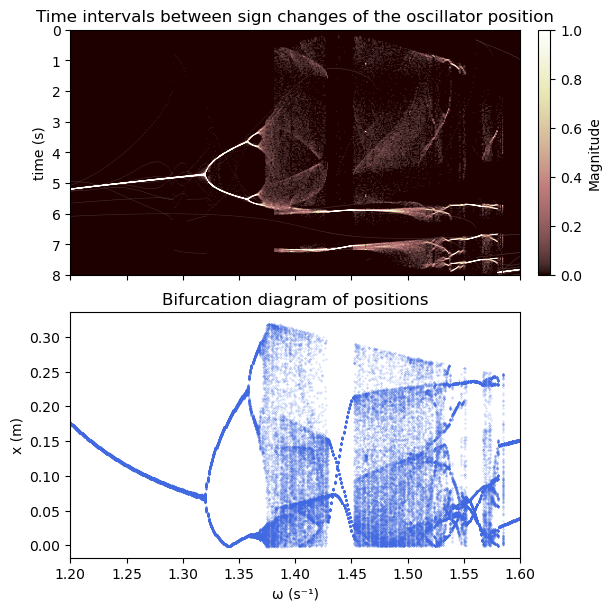

In [10]:
fig2,(ax5,ax6) = plt.subplots(2,1, figsize=(6, 6), sharex = True, constrained_layout = True)

im = ax5.imshow(np.transpose(tdist_hist)/4,cmap = 'pink',vmin = 0, vmax = 1, aspect = 'auto', extent = [min(w),max(w),8,0])
plt.colorbar(im,label = 'Magnitude', ax = ax5,  pad = 0.005)
ax5.set_title('Time intervals between sign changes of the oscillator position')
ax5.set_ylabel('time (s)')
ax6.set_xlabel('ω (s⁻¹)')

num = 200 # Número de puntos representados por cada w
for i in range(w.size):
    ax6.plot(w[i]*np.ones(num),np.array(xp[i],dtype=object)[-num:],'.',color='royalblue',markersize='0.5',alpha=0.5)
ax6.set_ylabel('x (m)')
ax6.set_xlim(min(w),max(w))
ax6.set_title('Bifurcation diagram of positions')

fig2.savefig('FIGURA2.png')

Representación figura 3: Poincaré 3D

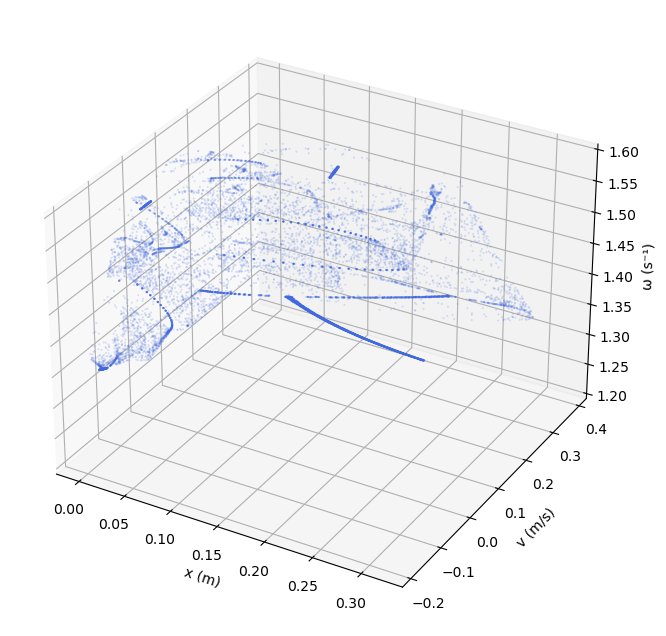

In [11]:
fig3 = plt.figure(figsize = (8,8))

ax7 = fig3.add_subplot(111, projection='3d')
num = 38 # Número de puntos representados por cada w
for i in range(w.size):
    ax7.scatter(np.array(xp[i],dtype=object)[-num:],np.array(vp[i],dtype=object)[-num:],w[i]*np.ones(num),'.',color='royalblue',s = 0.2,alpha = 0.2)
ax7.set_xlabel('x (m)')
ax7.set_ylabel('v (m/s)')
ax7.set_zlabel('ω (s⁻¹)')
#ax7.set_title('Espacio de fases con los puntos del diagrama de bifurcación')
ax7.set_zlim([1.2,1.6])
fig3.savefig('FIGURA3.png')
plt.show()

Representación figura 4: Evolución Poincaré con ω

Actualización del diagrama en cada frame de la animación

In [12]:
def update_Poincare(num,xp,vp):
    plt.cla()
    plt.plot(xp[num][50:],vp[num][50:],'.',color='red',markersize='1')
    plt.xlim([-0.05,0.4])
    plt.ylim([-0.25,0.4])
    plt.title('Evolución de la sección de Poincaré con ω')
    plt.xlabel('x (m)')
    plt.ylabel('v (m/s)')
    plt.suptitle('ω = '+str(format(w[num],'.3f'))+' s⁻¹')

In [13]:
def update_fig(num,xp,vp):
    ax9.cla()
    ax10.cla()
    ax11.cla()
    
    Num = 200
    ax10.plot(xp[num][50:],vp[num][50:],'.',color='red',markersize='1')
    for i in range(w.size):
        ax11.plot(np.array(xp[i],dtype=object)[-Num:],w[i]*np.ones(Num),'.',color='royalblue',markersize='0.5',alpha=0.5)
        ax9.plot(w[i]*np.ones(Num),np.array(vp[i],dtype=object)[-Num:],'.',color='royalblue',markersize='0.5',alpha=0.5)
    ax11.plot([-0.2,0.4],[w[num],w[num]], color = 'red')
    ax9.plot([w[num],w[num]],[-0.2,0.4], color = 'red')

    ax10.set_xlim([-0.2,0.4])
    ax10.set_ylim([-0.2,0.4])
    ax10.set_title('Evolución de la sección de Poincaré con ω')
    ax10.set_xlabel('x (m)')
    ax10.set_ylabel('v (m/s)')
    fig4.suptitle('ω = '+str(format(w[num],'.3f'))+' s⁻¹', y = 0.935)
    ax11.set_ylabel('ω (s⁻¹)')
    ax11.set_xlabel('x (m)')
    ax11.set_ylim([min(w),max(w)])
    ax11.set_xlim([-0.2,0.4])
    ax11.set_title('Diagrama de bifurcación de las posiciones')
    ax11.invert_yaxis()
    ax9.set_xlabel('ω (s⁻¹)')
    ax9.set_ylabel('v (m)')
    ax9.set_xlim([min(w),max(w)])
    ax9.set_ylim([-0.2,0.4])
    ax9.set_title('Diagrama de bifurcación de las velocidades')
    ax9.invert_xaxis()

Representación de resultados mediante animación

C:\Users\rodri\AppData\Local\Temp\ipykernel_22944\1212985710.py:19: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  animP.save('FIGURA4.gif')
C:\Users\rodri\AppData\Local\Temp\ipykernel_22944\1212985710.py:20: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  animP.save('FIGURA4.mp4')
c:\Users\rodri\anaconda3\envs\QuantumChaos\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


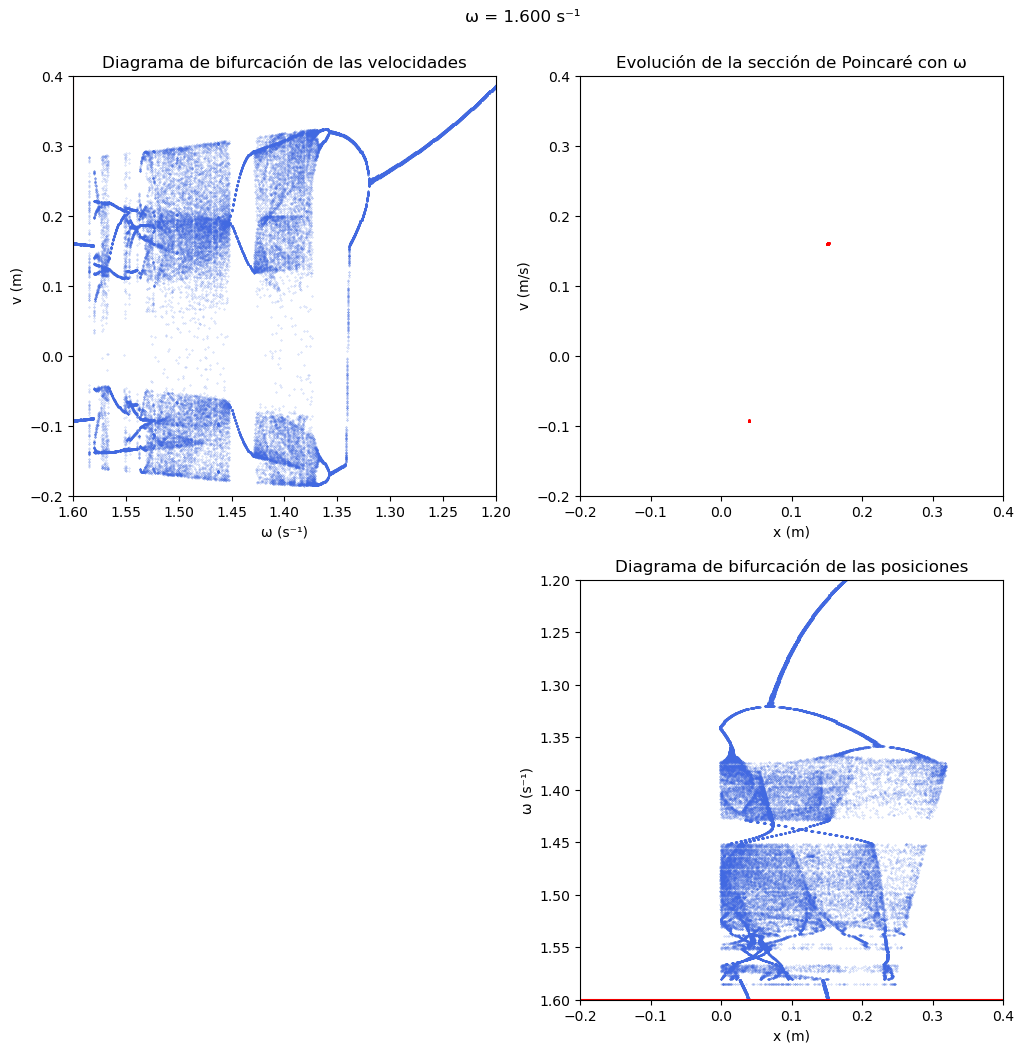

In [14]:
#fig4,(ax9,ax10,ax11) = plt.subplots(2,2, figsize=(16, 6), constrained_layout = True)
fig4 = plt.figure(figsize=(12,12), constrained_layout=True)

gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
ax9 = plt.subplot(gs[0, :2], )
ax10 = plt.subplot(gs[0, 2:])
ax11 = plt.subplot(gs[1, 2:])

Num = 200
ax10.plot(xp[0][50:],vp[0][50:],'.',color='red',markersize='1')
for i in range(w.size):
    ax11.plot(np.array(xp[i],dtype=object)[-Num:],w[i]*np.ones(Num),'.',color='royalblue',markersize='0.5',alpha=0.5)
    ax9.plot(w[i]*np.ones(Num),np.array(vp[i],dtype=object)[-Num:],'.',color='royalblue',markersize='0.5',alpha=0.5)
ax11.plot([-0.2,0.4],[w[0],w[0]], color = 'red')
ax9.plot([w[0],w[0]],[-0.2,0.4], color = 'red')

animP = animation.FuncAnimation(fig4, update_fig, np.size(w), fargs = (xp,vp, ), interval = 20)
animP.save('FIGURA4.gif')
animP.save('FIGURA4.mp4')

Representación figura 5: Evolución Poincaré con T

Actualización del diagrama en cada frame de la animación

In [8]:
def update_PoincareT(num,xp,vp):
    plt.cla()
    plt.rc('xtick', labelsize=14) 
    plt.rc('ytick', labelsize=14)
    plt.plot(xp[num][50:],vp[num][50:],'.',color='red',markersize='1')
    plt.xlim([-0.05,0.8])
    plt.ylim([-0.5,0.5])
    plt.title('Sección de Poincaré (ω = '+str(format(wT,'.3f'))+' s⁻¹)',fontsize = 14)
    plt.xlabel('x (m)',fontsize = 14)
    plt.ylabel('v (m/s)',fontsize = 14)
    plt.suptitle('Puntos registrados cada nT+'+str(format(num*0.1,'.1f'))+' s')

Representación de resultados mediante animación

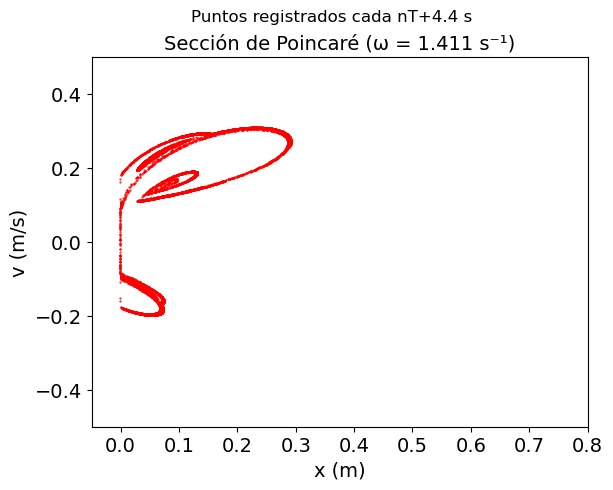

In [9]:
imT = plt.figure()
figT = plt.plot(xpT[0][50:],vpT[0][50:],'.',color='red',markersize='1')

animP = animation.FuncAnimation(imT, update_PoincareT, int(np.round(TT*10)), fargs = (xpT,vpT, ), interval = 100)
animP.save('FIGURA5.gif')
animP.save('FIGURA5.mp4')

Secciones Poincare para el report

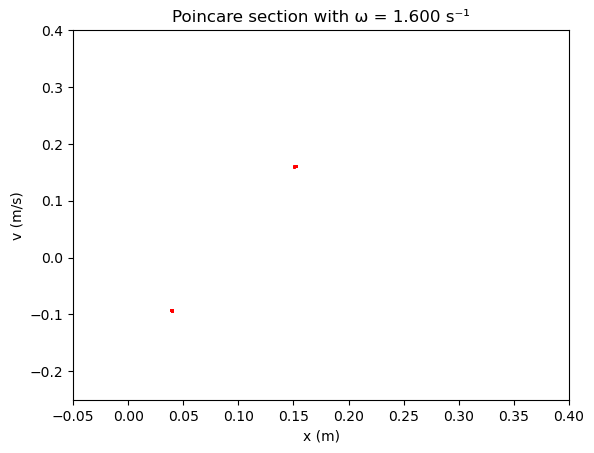

In [17]:
for n in range(np.size(w)):
    plt.cla()
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10)
    plt.plot(xp[n][50:],vp[n][50:],'.',color='red',markersize='1')
    plt.xlim([-0.05,0.4])
    plt.ylim([-0.25,0.4])
    plt.title('Poincare section with ω = '+str(format(w[n],'.3f'))+' s⁻¹')
    plt.xlabel('x (m)')
    plt.ylabel('v (m/s)')
    plt.savefig('SP ω = '+str(format(w[n],'.3f'))+' s⁻¹.png')

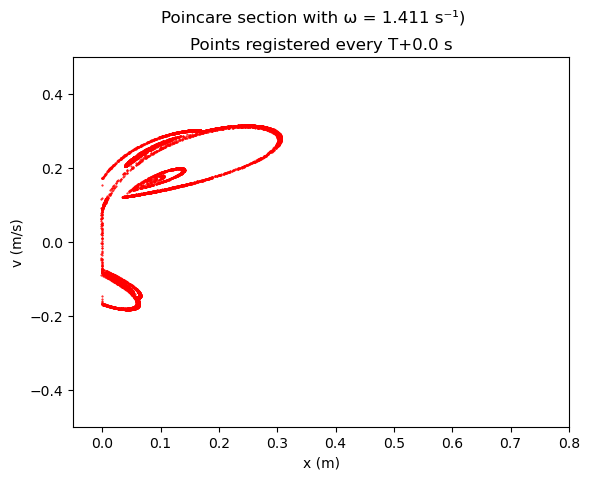

In [18]:
n2 = 0
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.plot(xpT[n2][50:],vpT[n2][50:],'.',color='red',markersize='1')
plt.xlim([-0.05,0.8])
plt.ylim([-0.5,0.5])
plt.suptitle('Poincare section with ω = '+str(format(wT,'.3f'))+' s⁻¹)')
plt.xlabel('x (m)')
plt.ylabel('v (m/s)')
plt.title('Points registered every T+'+str(format(n2*0.1,'.1f'))+' s')
plt.savefig('SP T = '+str(format(n2*0.1,'.1f'))+' s.png')

Text(0.5, 1.0, 'Bifurcation diagram of positions')

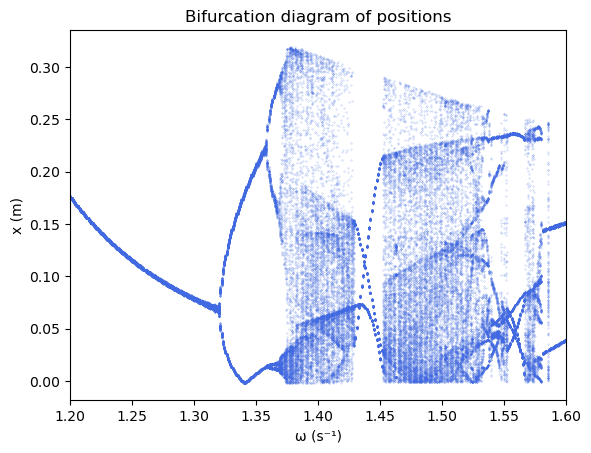

In [19]:
num = 200 # Número de puntos representados por cada w
for i in range(w.size):
    plt.plot(w[i]*np.ones(num),np.array(xp[i],dtype=object)[-num:],'.',color='royalblue',markersize='0.5',alpha=0.5)
plt.ylabel('x (m)')
plt.xlabel('ω (s⁻¹)')
plt.xlim(min(w),max(w))
plt.title('Bifurcation diagram of positions')